In [5]:
!pip3 install plotnine
import pandas as pd
from plotnine import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 34.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [7]:
df_plays = pd.read_csv('plays.csv')

In [9]:
df_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


In [10]:
df_plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 10 rows containing missing values.


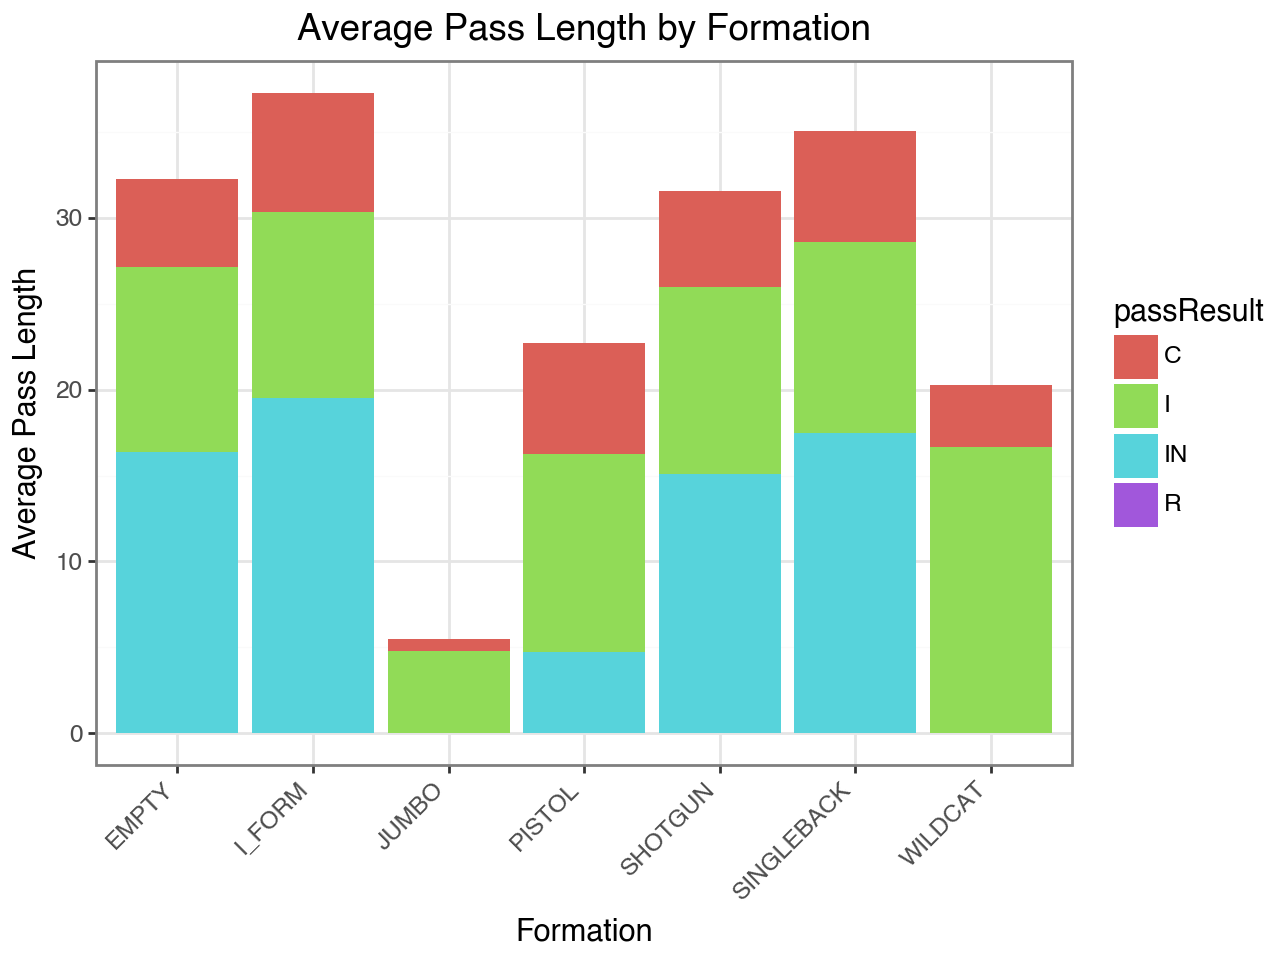

In [11]:
df_plays['offenseFormation'].value_counts()

df_offense_formation_pass_length = df_plays.groupby(['offenseFormation', 'passResult'])['passLength'].mean().reset_index()
(ggplot(df_offense_formation_pass_length, aes(x='offenseFormation', y='passLength', fill='passResult')) +
 geom_col() +
 theme_bw() +
 theme(axis_text_x=element_text(rotation=45, hjust=1)) +
 labs(
    title='Average Pass Length by Formation',
    x='Formation',
    y='Average Pass Length'
  )
 )

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 7419 rows containing missing values.


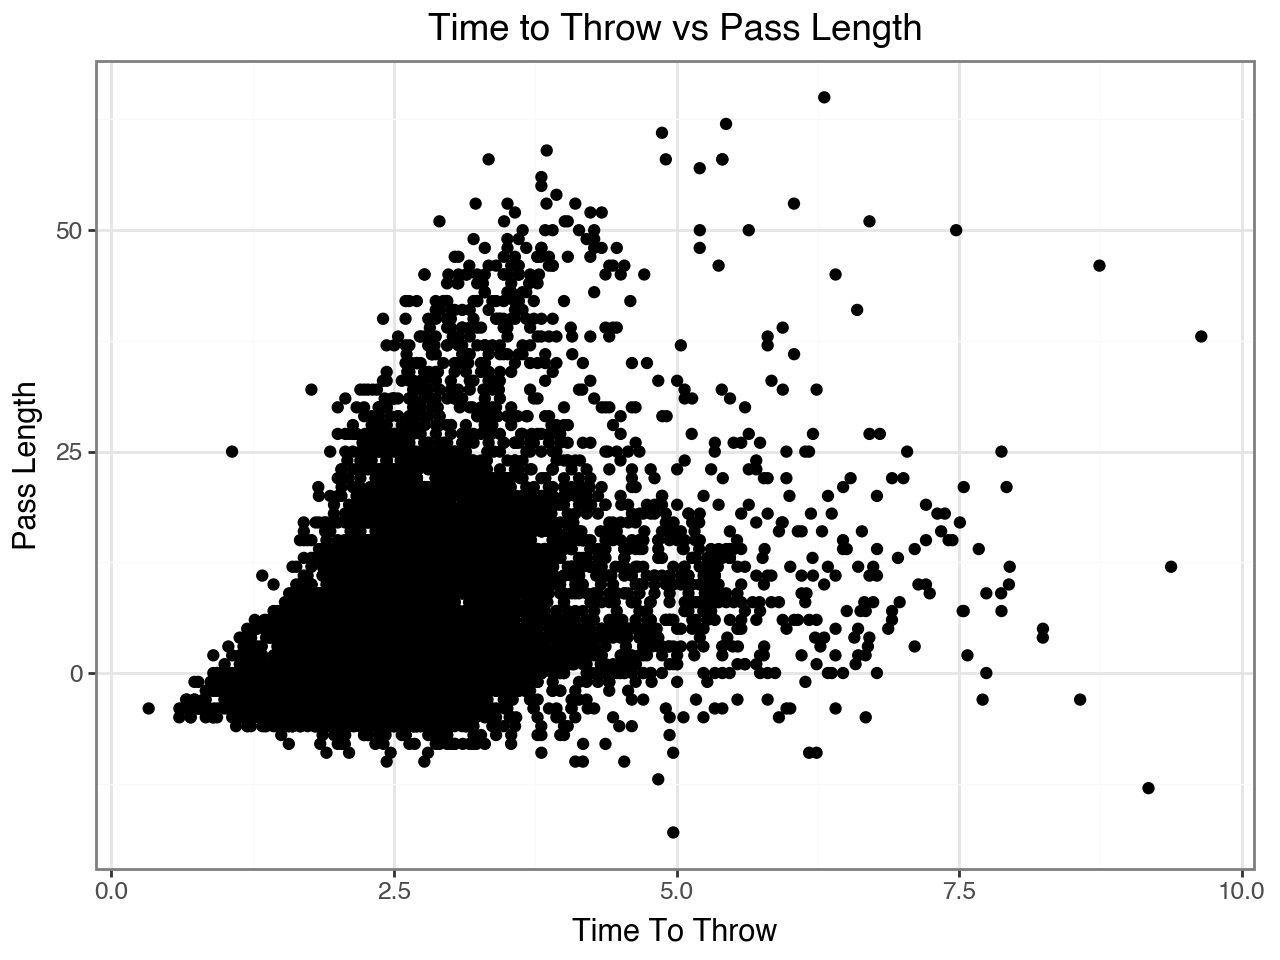

In [12]:
(ggplot(df_plays, aes(x='timeToThrow', y='passLength')) +
 geom_point() +
 theme_bw() +
 labs(
    title='Time to Throw vs Pass Length',
    x='Time To Throw',
    y='Pass Length'
  ))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 13 rows containing missing values.


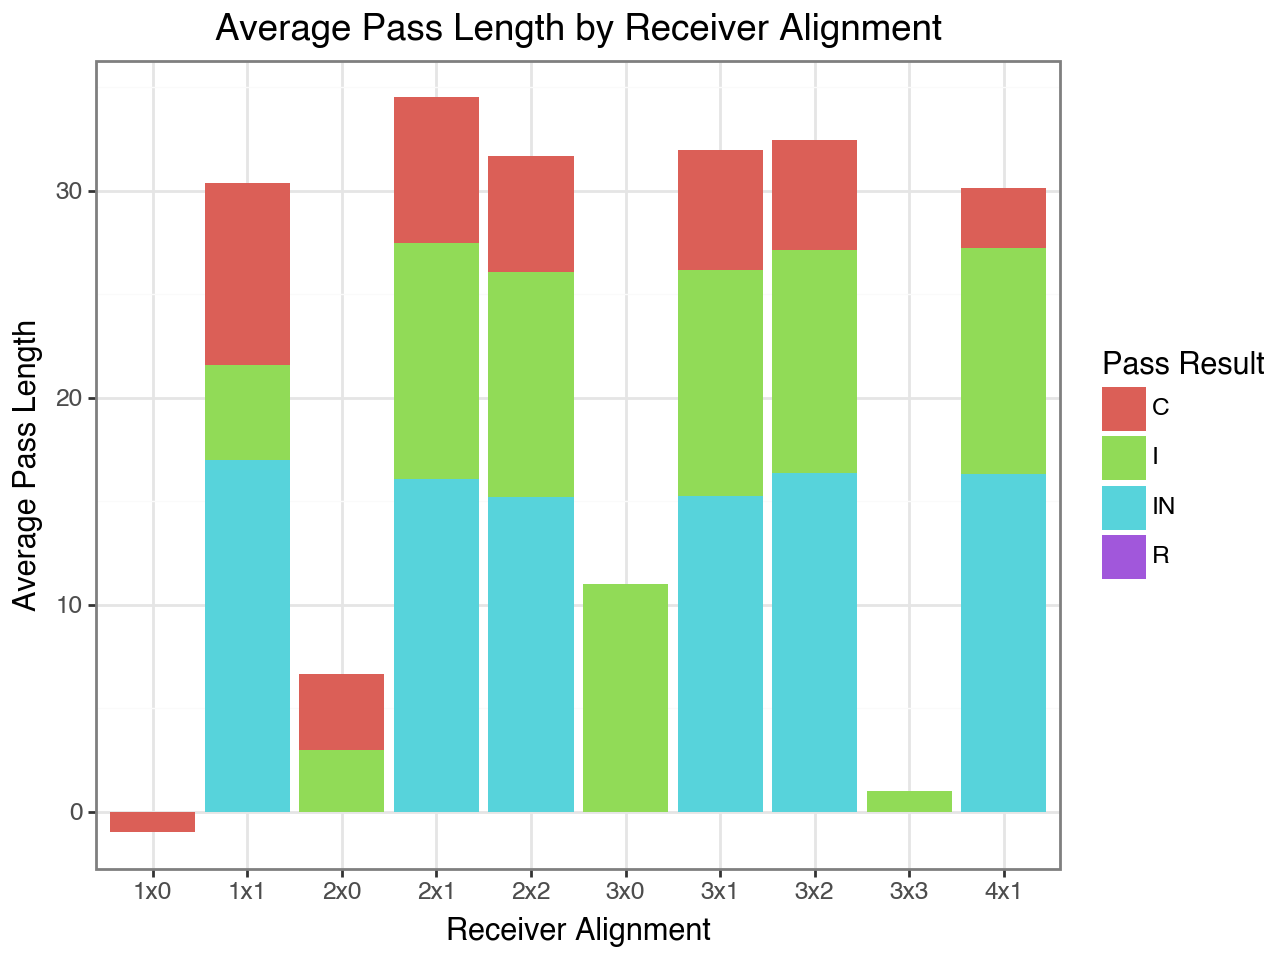

In [13]:
df_receiver_alignment_pass_length = df_plays.groupby(['receiverAlignment', 'passResult'])['passLength'].mean().reset_index()

(ggplot(df_receiver_alignment_pass_length, aes(x='receiverAlignment', y='passLength', fill='passResult')) +
 geom_col() +
 theme_bw() +
 labs(
    title='Average Pass Length by Receiver Alignment',
    x='Receiver Alignment',
    y='Average Pass Length',
    fill='Pass Result'
  )
 )